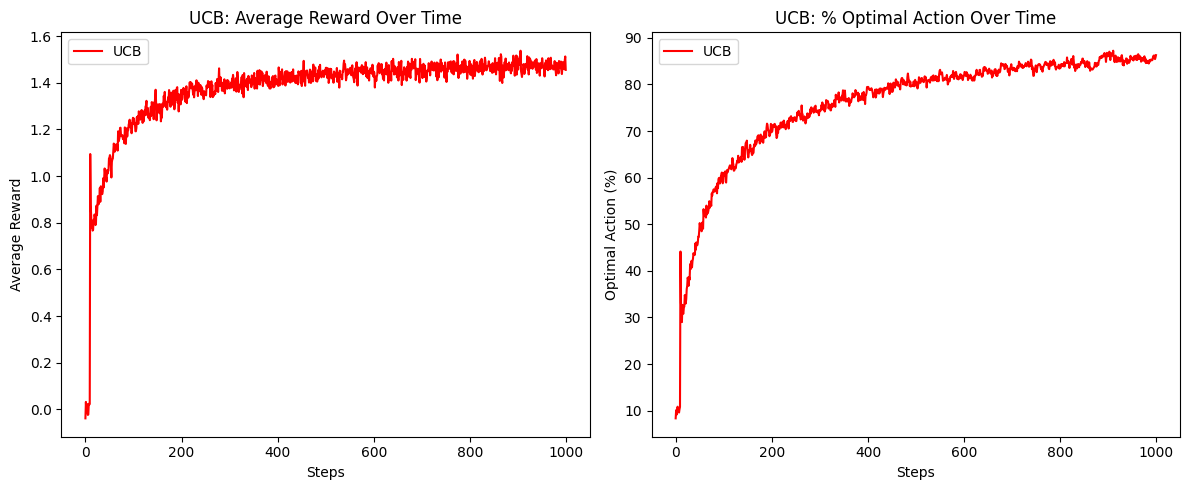

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def ucb(k=10, c=2, steps=1000, runs=2000):
    rewards = np.zeros((runs, steps))
    optimal_action_counts = np.zeros((runs, steps))

    for run in range(runs):
        q_true = np.random.randn(k)
        q_est = np.zeros(k)
        action_count = np.zeros(k)
        optimal_action = np.argmax(q_true)

        for t in range(1, steps + 1):  # from 1 to steps
            ucb_est = q_est + c * np.sqrt(np.log(t + 1) / (action_count + 1e-5))
            action = np.argmax(ucb_est)

            reward = np.random.randn() + q_true[action]
            action_count[action] += 1
            q_est[action] += (reward - q_est[action]) / action_count[action]

            rewards[run, t - 1] = reward
            if action == optimal_action:
                optimal_action_counts[run, t - 1] = 1

    avg_rewards = rewards.mean(axis=0)
    optimal_action_perc = optimal_action_counts.mean(axis=0) * 100

    return avg_rewards, optimal_action_perc

# 執行並畫圖
avg_rewards, optimal_action_perc = ucb(c=2)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(avg_rewards, label="UCB", color='red')
plt.title("UCB: Average Reward Over Time")
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.legend()

plt.subplot(1,2,2)
plt.plot(optimal_action_perc, label="UCB", color='red')
plt.title("UCB: % Optimal Action Over Time")
plt.xlabel("Steps")
plt.ylabel("Optimal Action (%)")
plt.legend()

plt.tight_layout()
plt.show()